#AI for Cyber Security
Understanding unsupervised Deep learning

#Deep Learning

Deep learning is a powerful subset of machine learning that uses artificial neural networks with multiple layers to learn complex patterns from large datasets.  Inspired by the way the human brain works, deep learning excels in tasks like image recognition, speech recognition, and natural language processing.


##Basic Types:
###**Feedforward Neural Networks** (FNNs):

This is the simplest ANN type. Data flows in one direction, from input to output layers. There are no feedback loops or cycles.

###**Multilayer Perceptrons** (MLPs):

MLPs are a type of FNN with multiple hidden layers between input and output. This allows them to learn complex, non-linear relationships.


###**Convolutional Neural Networks** (CNNs):

Primarily used for image and video analysis, CNNs automatically extract relevant features for classification and object detection.


###**Recurrent Neural Networks** (RNNs):

Designed to process sequential data (e.g., text, time-series, audio). RNNs have a "memory" capacity, making them perfect for language modeling and machine translation.

Further Reading

TensorFlow Deep Learning Tutorials: https://www.tensorflow.org/tutorials

# Impoting necessary liberaries

In [14]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Loading the Dataset

Loading and dataset into train and test sets

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


### Data Exploration

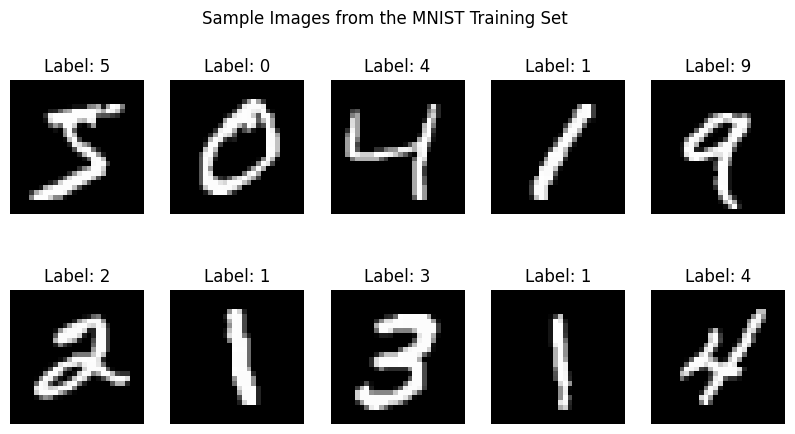

In [3]:
# Display the first few images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from the MNIST Training Set")
plt.show()

### Data preprocessing

In [4]:
# normalization
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [5]:
# converting the data into categorical variables
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


### Building the Model

In [6]:
# Build a simple neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
750/750 [==============================] - 45s 57ms/step - loss: 0.2089 - accuracy: 0.9354 - val_loss: 0.0747 - val_accuracy: 0.9778
Epoch 2/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0587 - accuracy: 0.9815 - val_loss: 0.0536 - val_accuracy: 0.9850
Epoch 3/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0488 - val_accuracy: 0.9855
Epoch 4/5
750/750 [==============================] - 38s 50ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0463 - val_accuracy: 0.9852
Epoch 5/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0420 - val_accuracy: 0.9880


# Model Evaluation

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0274 - accuracy: 0.9911
Test accuracy: 0.991100013256073


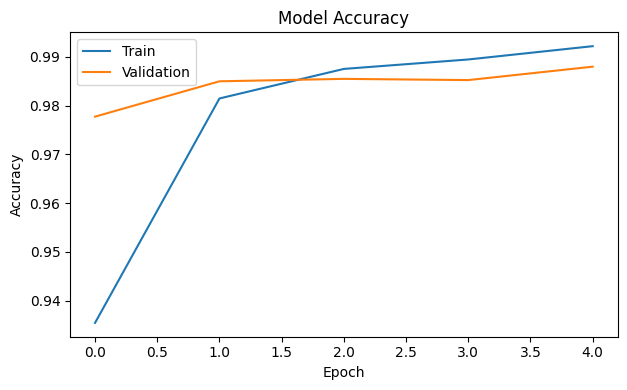

In [10]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

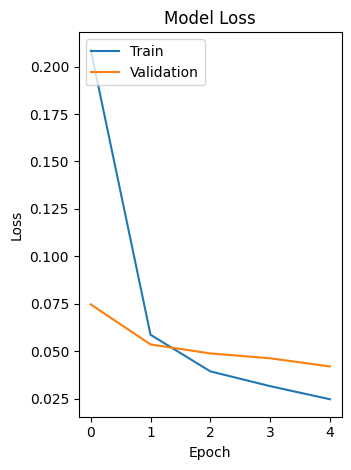

In [11]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 38ms/step


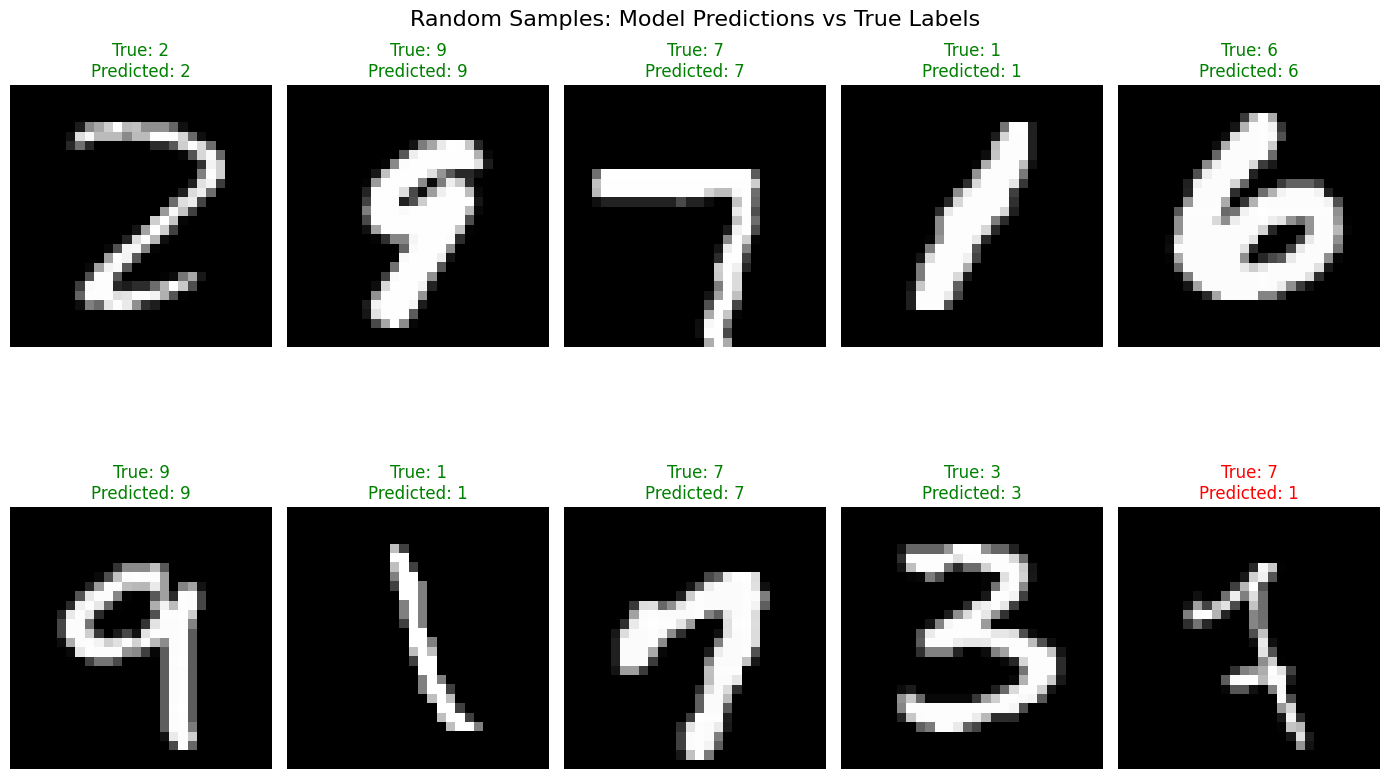

In [34]:
# Load the MNIST dataset
(_, _), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
test_labels_categorical = to_categorical(test_labels)

# Randomly select 10 indices from the test set
random_indices = np.random.choice(len(test_labels), size=10, replace=False)

# Randomly select samples from the test set
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

# Make predictions using the trained model
predictions = np.argmax(model.predict(random_test_images), axis=1)

# Visualize the random samples with increased spacing
plt.figure(figsize=(14, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)

    # Check if the prediction matches the true label
    color = 'green' if predictions[i] == random_test_labels[i] else 'red'

    plt.imshow(random_test_images[i, :, :, 0], cmap='gray')
    plt.title(f"True: {random_test_labels[i]}\nPredicted: {predictions[i]}", color=color)
    plt.axis('off')

plt.suptitle("Random Samples: Model Predictions vs True Labels", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title from being cut off
plt.subplots_adjust(hspace=0.5)  # Increase vertical spacing
plt.show()
